#Text Classification

###Importazioni librerie

In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from keras.layers import Embedding
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Flatten, Dense, GlobalAveragePooling1D, Dropout
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

###Importazione dataset

In [2]:
df = pd.read_csv('/content/Emotion_classify_Data.csv')
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


###.

In [4]:
# Parametri
max_words = 10000
maxlen = 50

# Eliminazione delle 'stop words'
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

if 'Comment' in df.columns:
    df['text_without_stopwords'] = df['Comment'].apply(remove_stopwords)
    print(df[['Comment', 'text_without_stopwords']].head())
else:
    print("DataFrame does not have a 'text' column. Please adjust the column name if necessary.")

# Tokenizzazione
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['Comment'])
sequences = tokenizer.texts_to_sequences(df['Comment'])
x_data = pad_sequences(sequences, maxlen=maxlen)

# Encoding etichette
le = LabelEncoder()
y_encoded = le.fit_transform(df['Emotion'])
y_data = to_categorical(y_encoded)
num_classes = y_data.shape[1]

# Split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                             Comment  \
0  i seriously hate one subject to death but now ...   
1                 im so full of life i feel appalled   
2  i sit here to write i start to dig out my feel...   
3  ive been really angry with r and i feel like a...   
4  i feel suspicious if there is no one outside l...   

                              text_without_stopwords  
0  seriously hate one subject death feel reluctan...  
1                         im full life feel appalled  
2  sit write start dig feelings think afraid acce...  
3  ive really angry r feel like idiot trusting fi...  
4  feel suspicious one outside like rapture happe...  


###Costruzione modello

In [7]:
# Modello
model = Sequential()
model.add(Embedding(max_words, 64))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# Callback
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)

###Addestramento - tentativo 1

In [6]:
# Addestramento
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[reduce_lr, checkpoint]
)

# Grafici
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


NameError: name 'reduce_lr' is not defined

###Addestramento - Tentativo 2

Aumentiamo batch size da 32 a 64, in modo tale che il modello si addestri su subset più grandi

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - acc: 0.3827 - loss: 1.0858 - val_acc: 0.4832 - val_loss: 0.9758 - learning_rate: 0.0010
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - acc: 0.6842 - loss: 0.7117 - val_acc: 0.8137 - val_loss: 0.5155 - learning_rate: 0.0010
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - acc: 0.9530 - loss: 0.1838 - val_acc: 0.8558 - val_loss: 0.4593 - learning_rate: 0.0010
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - acc: 0.9764 - loss: 0.0877 - val_acc: 0.8526 - val_loss: 0.5575 - learning_rate: 0.0010
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - acc: 0.9887 - loss: 0.0522 - val_acc: 0.8789 - val_loss: 0.4788 - learning_rate: 0.0010
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - acc: 0.9931 - loss: 0.0309 - val_acc: 0.8684 - val_loss: 0.6346 - learning_rate: 0.0010
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - acc: 0.9870 - loss: 0.0525 - val_acc: 0.8789 - val_loss: 0.5378 - learning_rate: 0.0010


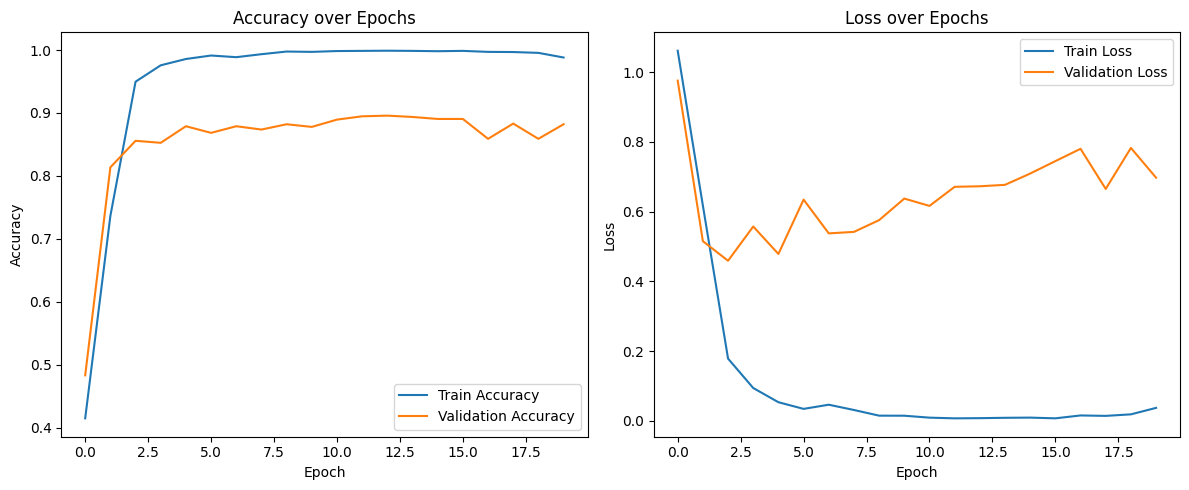

In [25]:
# Addestramento
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[reduce_lr, checkpoint]
)

# Grafici
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Il primo tentativo ha un leggero overfitting dovuto forse al modello che è troppo allenato, ma è comunque un overfitting costante.

Nel secondo l'overfitting è evidente e la loss in fase di validation è troppo alta.

L'opzione migliore rimane il primo tentativo ma ne facciamo un terzo mantenendo la batch size a 32 e aumentando il dropout per layer

###Costruzione e addestramento del modello - Tentativo 3


Aggiunta di dropout

Epoch 1/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - acc: 0.3394 - loss: 1.0992 - val_acc: 0.3905 - val_loss: 1.0717 - learning_rate: 0.0010
Epoch 2/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - acc: 0.6022 - loss: 0.8841 - val_acc: 0.8400 - val_loss: 0.4571 - learning_rate: 0.0010
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9466 - loss: 0.2036 - val_acc: 0.8695 - val_loss: 0.4242 - learning_rate: 0.0010
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - acc: 0.9822 - loss: 0.0758 - val_acc: 0.8874 - val_loss: 0.4072 - learning_rate: 0.0010
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - acc: 0.9923 - loss: 0.0426 - val_acc: 0.8758 - val_loss: 0.4988 - learning_rate: 0.0010
Epoch 6/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - acc: 0.9925 - loss: 0.0371 - val_acc: 0.9021 - val_loss: 0.4046 - learning_rate: 0.0010
Epoch 7/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - acc: 0.9957 - loss: 0.0274 - val_acc: 0.8884 - val_loss: 0.4926 - learning_rate: 0.001

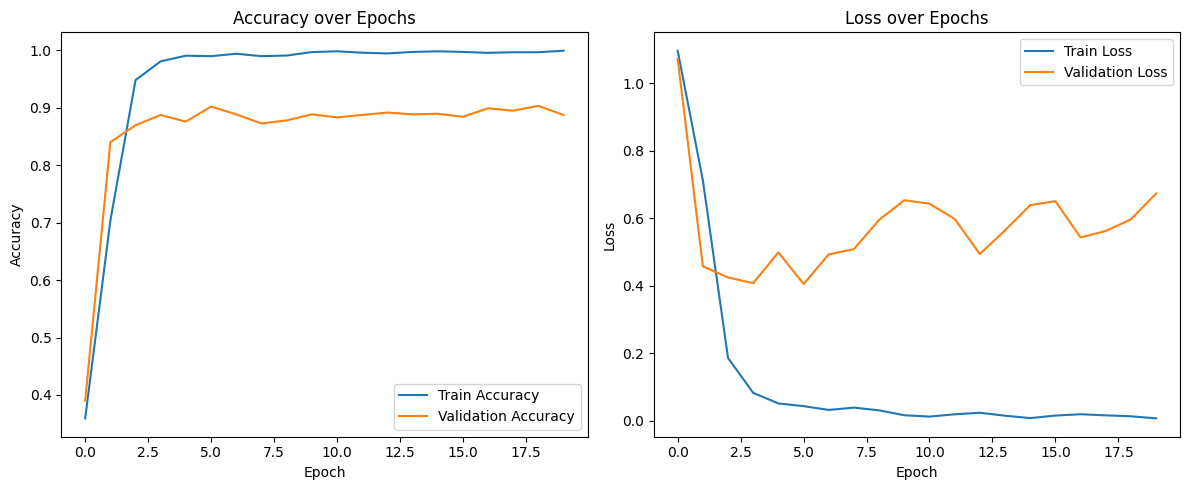

In [8]:
model = Sequential()
model.add(Embedding(max_words, 64))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# Callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Addestramento
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[reduce_lr, checkpoint]
)

# Grafici
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Si evince che il primo tentativo continua ad essere il migliore, possiamo accettarlo in quanto l'overfitting che presenta è costante nelle epoche